# Proje amacı; Telekominikasyon Müşteri Kaybı Tahmini (Classification Model)

In [1]:
import pandas as pd
df = pd.read_csv("./TelcoCustomerChurnData.csv") # veri setinin okutulması

In [2]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### _Gerekli Kütüphaneler İmport_

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error,r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
##### _uyarı mesajı almamak için_
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
df.info()   #veri sertinin tüm yapısal bilgileri - object veri tipi = Kategorik değişken

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#  -object değişkeni kategorik değişkene değiştirmemiz gerekli.

df.gender = pd.Categorical(df.gender)
df.SeniorCitizen = pd.Categorical(df.SeniorCitizen)
df.Partner = pd.Categorical(df.Partner)
df.PhoneService = pd.Categorical(df.PhoneService)
df.MultipleLines = pd.Categorical(df.MultipleLines)
df.InternetService = pd.Categorical(df.InternetService)
df.OnlineSecurity = pd.Categorical(df.OnlineSecurity)
df.OnlineBackup = pd.Categorical(df.OnlineBackup)
df.DeviceProtection = pd.Categorical(df.DeviceProtection)
df.TechSupport = pd.Categorical(df.TechSupport)
df.StreamingTV = pd.Categorical(df.StreamingTV)
df.StreamingMovies = pd.Categorical(df.StreamingMovies)
df.Contract = pd.Categorical(df.Contract)
df.PaperlessBilling = pd.Categorical(df.PaperlessBilling)
df.PaymentMethod = pd.Categorical(df.PaymentMethod)
df.Churn = pd.Categorical(df.Churn)

In [8]:
# Müşterilerden elde edilen toplam ücretleri kategorik değişkenden float'a dönüşümü.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [9]:
df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents            object
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [10]:
# Hiç eksik gözlem var mı?
df.isnull().values.any() 

True

In [11]:
# data içerisinde kaybedilen müşteriler ve devamlı müşteri adetleri.
df["Churn"].value_counts() 

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
# bağımsız değişkenlerin betimsel istatistikleri.
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


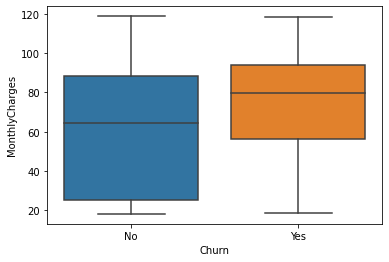

In [13]:
# aylık ödeme tutarları ile müşteri kaybı durumu.
sns.boxplot(x="Churn", y= "MonthlyCharges",data=df);  

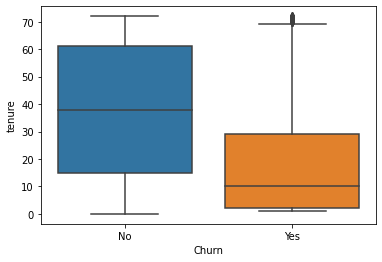

In [14]:
# müşterinin şirkette kaldığı ay sayısı ile müşteri kaybı durumu.
sns.boxplot(x="Churn", y= "tenure",data=df);  

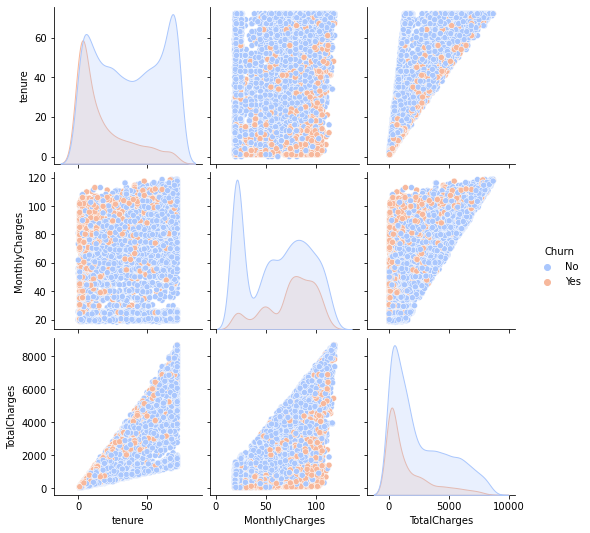

In [15]:
sns.pairplot(df,hue='Churn',palette = "coolwarm")
plt.show()

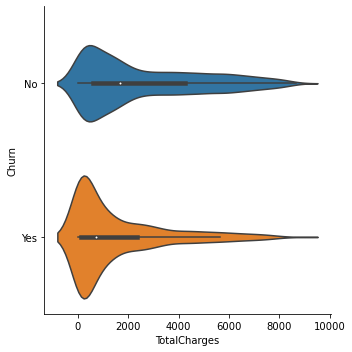

In [16]:
# müşterinin toplam ödediği fatura tutarının müşterinin ayrılmasına olan etkisi.
sns.catplot (x="TotalCharges",y="Churn", kind="violin",data=df);

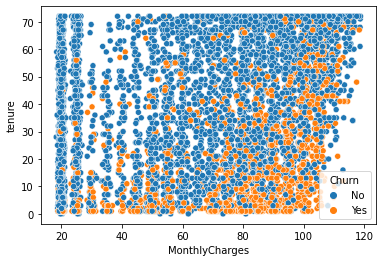

In [17]:
 # aylık ödeme turarları ve müşterilerin faturalarının ayrıılmalarına olan etkisi.
sns.scatterplot(x="MonthlyCharges", y="tenure", hue ="Churn",data = df);

In [18]:
df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents            object
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [19]:
#  Müşterilerin ID bilgilerinin olduğu kolonun silinmesi.
df.drop(columns="customerID",inplace=True)

In [20]:
df.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents            object
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [21]:
df[["PaymentMethod"]].head(15)

,PaymentMethod
0,Electronic check
1,Mailed check
2,Mailed check
3,Bank transfer (automatic)
4,Electronic check
5,Electronic check
6,Credit card (automatic)
7,Mailed check
8,Electronic check
9,Bank transfer (automatic)


In [22]:
df[["Contract"]].head(15)

,Contract
0,Month-to-month
1,One year
2,Month-to-month
3,One year
4,Month-to-month
5,Month-to-month
6,Month-to-month
7,Month-to-month
8,Month-to-month
9,One year


In [23]:
df[["InternetService"]].head(10)

,InternetService
0,DSL
1,DSL
2,DSL
3,DSL
4,Fiber optic
5,Fiber optic
6,Fiber optic
7,DSL
8,Fiber optic
9,DSL


In [24]:
df[["MultipleLines"]].head(10)

,MultipleLines
0,No phone service
1,No
2,No
3,No phone service
4,No
5,Yes
6,Yes
7,No phone service
8,Yes
9,No


In [25]:
df[["OnlineSecurity"]].head(100)

,OnlineSecurity
0,No
1,Yes
2,Yes
3,Yes
4,No
...,...
95,Yes
96,Yes
97,No internet service
98,No internet service


In [26]:
df[["gender"]].head(5)


,gender
0,Female
1,Male
2,Male
3,Male
4,Female


In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
# _Kategorik değişkenlerin dummy değişkene çevirme
df['Churn'].replace(to_replace ='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace = 'No', value=0, inplace=True)
df = pd.get_dummies(df)

In [29]:
df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_0,Churn_1
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,1,0,1,0,0,0,0,1,1,0
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [30]:
df.drop('Churn_1', axis=1, inplace=True)

In [31]:
df.isnull().sum().sum()

11

In [32]:
df = df.dropna()

In [33]:
df.isnull().sum().sum()

0

In [34]:
df["Churn_0"].value_counts()

1    5163
0    1869
Name: Churn_0, dtype: int64

In [35]:
names = df.columns.tolist()
names[names.index('Churn_0')] = 'Churn'
df.columns = names

In [36]:
df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,29.85,29.85,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,1
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,2,70.70,151.65,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [37]:
y = df["Churn"]   # bağımlı değişkeni y ye kaydettik
X = df.drop(["Churn"], axis = 1)  # X değerine bağımlı değişkenlerin dışında kalan bilgilerin tamamını eklemiş olduk.

In [38]:
# train - test ayırma işlemi
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42)

### _Standartlaştırma_

In [53]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

## Loj. Reg.

In [54]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train)

In [55]:
y_pred = loj_model.predict(X_test)

In [56]:
print(accuracy_score(y_test,y_pred))    # Test seti başarı oranı %80

0.7981042654028436


In [57]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean() # 10 hatanın ortalaması

0.7985781990521328

## KNN 

In [58]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(1,50)}

In [59]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train) #1. Arguman: model nesnesi , 2. Arguman aranacak olan parametreler.

In [60]:
knn_cv_model.best_params_ 

{'n_neighbors': 49}

In [61]:
knn_model = KNeighborsClassifier(n_neighbors = 27).fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)   # başarı oranı %78.

0.7815165876777251

## SVM

In [62]:
svm_model = SVC(C=2, kernel = "linear").fit(X_train,y_train) # ceza parametresi 2
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)   # başarı oranı %78.

0.7909952606635071

## Yapay Sinir Ağları

In [68]:
mlpc_params = {"alpha":[1,5,10,0.1,0.01,],    # alpha: ceza argumanı
               "hidden_layer_sizes":[(10,10),(3,5)]} 
mlpc = MLPClassifier(solver = "lbfgs",activation = "logistic") 

mlpc_cv_model = GridSearchCV(mlpc,mlpc_params, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [69]:
mlpc_cv_model.best_params_

{'alpha': 5, 'hidden_layer_sizes': (3, 5)}

In [71]:
mlpc_model = MLPClassifier(solver = "lbfgs",activation='logistic', alpha = 5, hidden_layer_sizes = (3,5)).fit(X_train, y_train) 
y_pred = mlpc_model.predict(X_test)
accuracy_score(y_test, y_pred)   # başarı oranı %79

0.7966824644549763

## CART

In [74]:
cart = DecisionTreeClassifier()
cart_params = {"max_depth": [1,3,5,8,10],
               "min_samples_split": [2,3,5,10,20,50]}    # minimum dallanma parametreler
cart_cv_model = GridSearchCV(cart, cart_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [75]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 50}

In [76]:
cart_model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 50).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)             #Başarı oranı %78

0.7815165876777251

## Random Forests

In [78]:
X_train.shape    # veri seti içerisinde 46 tane bağımsız değişken var.

(4922, 46)

In [79]:
rf = RandomForestClassifier()
rf_params = {"n_estimators": [100,200,500,1000],         #Kullanılacak olan ağaç sayısı
             "max_features": [3,10,25,32],               # Maksimum değişken 
             "min_samples_split": [2,5,10,20]}
rf_cv_model = GridSearchCV(rf, rf_params, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [80]:
rf_cv_model.best_params_

{'max_features': 3, 'min_samples_split': 20, 'n_estimators': 100}

In [81]:
rf_model = RandomForestClassifier(max_features=3, 
                                  min_samples_split=20,
                                  n_estimators=100).fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)           # Başarı oranı %79 

0.7924170616113744

## GBM

In [85]:
gbm = GradientBoostingClassifier()

gbm_params = {"learning_rate":[0.1, 0.01, 0.001, 0.05],
              "n_estimators": [100,300,500,1000],   #ağaç sayısının fazla olması; rassallığı sağlamak için yuksek değerler alması işimize gelir.
              "max_depth":[2,3,5,8]}   

gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [86]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

In [88]:
gbm_model = GradientBoostingClassifier(learning_rate = 0.01,
                                       max_depth = 3,
                                       n_estimators = 300).fit (X_train, y_train)
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)           # başarı oranı %79

0.7933649289099526

## Light GBM

In [91]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
               "n_estimators": [200, 500, 100],
                "max_depth": [5,15,26,35]}

In [92]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [93]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [96]:
lgbm_model = LGBMClassifier( learning_rate = 0.01,
                             max_depth = 5,
                             n_estimators = 500).fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)     # başarı oranı %80

0.8

## Cat Boost

In [98]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier()
catb_params = {"iterations": [200,500,1000],          # ağaç sayısını ifade eder 
               "learning_rate": [0.01, 0.03, 0.1],
               "depth": [12,20,32]}             

In [99]:
catb_cv_model = GridSearchCV(catb, catb_params, cv = 3, n_jobs = -1, verbose=2).fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
61 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\catboost\core.py", line 5007, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\lenovo\anaconda3\lib\site-packages\catboost\core.py", line 2278

0:	learn: 0.6849704	total: 285ms	remaining: 2m 22s
1:	learn: 0.6771483	total: 399ms	remaining: 1m 39s
2:	learn: 0.6693397	total: 509ms	remaining: 1m 24s
3:	learn: 0.6621133	total: 545ms	remaining: 1m 7s
4:	learn: 0.6553413	total: 655ms	remaining: 1m 4s
5:	learn: 0.6481648	total: 774ms	remaining: 1m 3s
6:	learn: 0.6414488	total: 788ms	remaining: 55.5s
7:	learn: 0.6348780	total: 899ms	remaining: 55.3s
8:	learn: 0.6286956	total: 915ms	remaining: 49.9s
9:	learn: 0.6222537	total: 1.04s	remaining: 50.9s
10:	learn: 0.6163651	total: 1.15s	remaining: 51.1s
11:	learn: 0.6111136	total: 1.16s	remaining: 47s
12:	learn: 0.6051130	total: 1.27s	remaining: 47.7s
13:	learn: 0.5991321	total: 1.38s	remaining: 48s
14:	learn: 0.5935545	total: 1.5s	remaining: 48.6s
15:	learn: 0.5886448	total: 1.51s	remaining: 45.7s
16:	learn: 0.5835103	total: 1.62s	remaining: 46.1s
17:	learn: 0.5779847	total: 1.72s	remaining: 46.1s
18:	learn: 0.5734298	total: 1.78s	remaining: 45.2s
19:	learn: 0.5686361	total: 1.85s	remaining

162:	learn: 0.3166889	total: 17.5s	remaining: 36.2s
163:	learn: 0.3157666	total: 17.6s	remaining: 36.2s
164:	learn: 0.3151648	total: 17.8s	remaining: 36.1s
165:	learn: 0.3145327	total: 17.9s	remaining: 36s
166:	learn: 0.3143799	total: 17.9s	remaining: 35.7s
167:	learn: 0.3141911	total: 17.9s	remaining: 35.4s
168:	learn: 0.3137990	total: 18s	remaining: 35.3s
169:	learn: 0.3133053	total: 18.2s	remaining: 35.2s
170:	learn: 0.3127286	total: 18.3s	remaining: 35.1s
171:	learn: 0.3119041	total: 18.4s	remaining: 35.1s
172:	learn: 0.3112959	total: 18.5s	remaining: 35s
173:	learn: 0.3107544	total: 18.6s	remaining: 34.9s
174:	learn: 0.3102487	total: 18.7s	remaining: 34.8s
175:	learn: 0.3093730	total: 18.8s	remaining: 34.7s
176:	learn: 0.3088642	total: 19s	remaining: 34.6s
177:	learn: 0.3081827	total: 19.1s	remaining: 34.5s
178:	learn: 0.3076632	total: 19.2s	remaining: 34.4s
179:	learn: 0.3071451	total: 19.3s	remaining: 34.3s
180:	learn: 0.3065449	total: 19.4s	remaining: 34.3s
181:	learn: 0.305959

322:	learn: 0.2403093	total: 34.4s	remaining: 18.9s
323:	learn: 0.2399518	total: 34.5s	remaining: 18.8s
324:	learn: 0.2396250	total: 34.7s	remaining: 18.7s
325:	learn: 0.2392870	total: 34.8s	remaining: 18.6s
326:	learn: 0.2390734	total: 34.9s	remaining: 18.5s
327:	learn: 0.2387747	total: 35s	remaining: 18.4s
328:	learn: 0.2384469	total: 35.1s	remaining: 18.3s
329:	learn: 0.2381116	total: 35.3s	remaining: 18.2s
330:	learn: 0.2376593	total: 35.4s	remaining: 18.1s
331:	learn: 0.2373540	total: 35.5s	remaining: 18s
332:	learn: 0.2369867	total: 35.6s	remaining: 17.9s
333:	learn: 0.2365283	total: 35.7s	remaining: 17.8s
334:	learn: 0.2360728	total: 35.9s	remaining: 17.7s
335:	learn: 0.2357143	total: 36s	remaining: 17.6s
336:	learn: 0.2353481	total: 36.1s	remaining: 17.5s
337:	learn: 0.2348962	total: 36.2s	remaining: 17.4s
338:	learn: 0.2346005	total: 36.3s	remaining: 17.2s
339:	learn: 0.2345898	total: 36.3s	remaining: 17.1s
340:	learn: 0.2340991	total: 36.4s	remaining: 17s
341:	learn: 0.233798

481:	learn: 0.1980165	total: 51.3s	remaining: 1.92s
482:	learn: 0.1978768	total: 51.4s	remaining: 1.81s
483:	learn: 0.1976505	total: 51.5s	remaining: 1.7s
484:	learn: 0.1974134	total: 51.7s	remaining: 1.6s
485:	learn: 0.1972539	total: 51.8s	remaining: 1.49s
486:	learn: 0.1970625	total: 51.9s	remaining: 1.39s
487:	learn: 0.1970509	total: 51.9s	remaining: 1.28s
488:	learn: 0.1968362	total: 52s	remaining: 1.17s
489:	learn: 0.1966036	total: 52.1s	remaining: 1.06s
490:	learn: 0.1964051	total: 52.3s	remaining: 958ms
491:	learn: 0.1962741	total: 52.4s	remaining: 851ms
492:	learn: 0.1961026	total: 52.5s	remaining: 745ms
493:	learn: 0.1957918	total: 52.6s	remaining: 639ms
494:	learn: 0.1955857	total: 52.7s	remaining: 533ms
495:	learn: 0.1954358	total: 52.8s	remaining: 426ms
496:	learn: 0.1952694	total: 52.9s	remaining: 320ms
497:	learn: 0.1950948	total: 53.1s	remaining: 213ms
498:	learn: 0.1950942	total: 53.1s	remaining: 106ms
499:	learn: 0.1948147	total: 53.2s	remaining: 0us


In [100]:
catb_cv_model.best_params_

{'depth': 12, 'iterations': 500, 'learning_rate': 0.01}

In [101]:
catb_model = CatBoostClassifier(depth = 12,
                                iterations = 500,
                                learning_rate = 0.01).fit(X_train, y_train)

y_pred = catb_model.predict(X_test)
accuracy_score(y_test, y_pred)       # başarı oranı %78

0:	learn: 0.6849704	total: 69.2ms	remaining: 34.5s
1:	learn: 0.6771483	total: 135ms	remaining: 33.5s
2:	learn: 0.6693397	total: 201ms	remaining: 33.3s
3:	learn: 0.6621133	total: 220ms	remaining: 27.3s
4:	learn: 0.6553413	total: 284ms	remaining: 28.1s
5:	learn: 0.6481648	total: 352ms	remaining: 29s
6:	learn: 0.6414488	total: 359ms	remaining: 25.3s
7:	learn: 0.6348780	total: 425ms	remaining: 26.1s
8:	learn: 0.6286956	total: 432ms	remaining: 23.5s
9:	learn: 0.6222537	total: 498ms	remaining: 24.4s
10:	learn: 0.6163651	total: 564ms	remaining: 25.1s
11:	learn: 0.6111136	total: 567ms	remaining: 23.1s
12:	learn: 0.6051130	total: 633ms	remaining: 23.7s
13:	learn: 0.5991321	total: 699ms	remaining: 24.3s
14:	learn: 0.5935545	total: 770ms	remaining: 24.9s
15:	learn: 0.5886448	total: 773ms	remaining: 23.4s
16:	learn: 0.5835103	total: 841ms	remaining: 23.9s
17:	learn: 0.5779847	total: 914ms	remaining: 24.5s
18:	learn: 0.5734298	total: 987ms	remaining: 25s
19:	learn: 0.5686361	total: 1.06s	remaining:

163:	learn: 0.3157666	total: 14.6s	remaining: 29.9s
164:	learn: 0.3151648	total: 14.7s	remaining: 29.8s
165:	learn: 0.3145327	total: 14.7s	remaining: 29.7s
166:	learn: 0.3143799	total: 14.7s	remaining: 29.4s
167:	learn: 0.3141911	total: 14.7s	remaining: 29.1s
168:	learn: 0.3137990	total: 14.8s	remaining: 29s
169:	learn: 0.3133053	total: 14.9s	remaining: 28.9s
170:	learn: 0.3127286	total: 14.9s	remaining: 28.8s
171:	learn: 0.3119041	total: 15s	remaining: 28.6s
172:	learn: 0.3112959	total: 15.1s	remaining: 28.5s
173:	learn: 0.3107544	total: 15.1s	remaining: 28.4s
174:	learn: 0.3102487	total: 15.2s	remaining: 28.2s
175:	learn: 0.3093730	total: 15.3s	remaining: 28.1s
176:	learn: 0.3088642	total: 15.4s	remaining: 28s
177:	learn: 0.3081827	total: 15.4s	remaining: 27.9s
178:	learn: 0.3076632	total: 15.5s	remaining: 27.8s
179:	learn: 0.3071451	total: 15.6s	remaining: 27.7s
180:	learn: 0.3065449	total: 15.7s	remaining: 27.6s
181:	learn: 0.3059595	total: 15.8s	remaining: 27.6s
182:	learn: 0.3052

322:	learn: 0.2403093	total: 30s	remaining: 16.4s
323:	learn: 0.2399518	total: 30.1s	remaining: 16.4s
324:	learn: 0.2396250	total: 30.2s	remaining: 16.3s
325:	learn: 0.2392870	total: 30.4s	remaining: 16.2s
326:	learn: 0.2390734	total: 30.5s	remaining: 16.1s
327:	learn: 0.2387747	total: 30.6s	remaining: 16s
328:	learn: 0.2384469	total: 30.7s	remaining: 16s
329:	learn: 0.2381116	total: 30.8s	remaining: 15.9s
330:	learn: 0.2376593	total: 31s	remaining: 15.8s
331:	learn: 0.2373540	total: 31.1s	remaining: 15.7s
332:	learn: 0.2369867	total: 31.2s	remaining: 15.7s
333:	learn: 0.2365283	total: 31.3s	remaining: 15.6s
334:	learn: 0.2360728	total: 31.5s	remaining: 15.5s
335:	learn: 0.2357143	total: 31.6s	remaining: 15.4s
336:	learn: 0.2353481	total: 31.7s	remaining: 15.3s
337:	learn: 0.2348962	total: 31.8s	remaining: 15.2s
338:	learn: 0.2346005	total: 31.9s	remaining: 15.2s
339:	learn: 0.2345898	total: 31.9s	remaining: 15s
340:	learn: 0.2340991	total: 32s	remaining: 14.9s
341:	learn: 0.2337980	to

481:	learn: 0.1980165	total: 47.5s	remaining: 1.77s
482:	learn: 0.1978768	total: 47.6s	remaining: 1.67s
483:	learn: 0.1976505	total: 47.6s	remaining: 1.57s
484:	learn: 0.1974134	total: 47.7s	remaining: 1.47s
485:	learn: 0.1972539	total: 47.8s	remaining: 1.38s
486:	learn: 0.1970625	total: 47.8s	remaining: 1.28s
487:	learn: 0.1970509	total: 47.8s	remaining: 1.18s
488:	learn: 0.1968362	total: 47.9s	remaining: 1.08s
489:	learn: 0.1966036	total: 48s	remaining: 979ms
490:	learn: 0.1964051	total: 48s	remaining: 880ms
491:	learn: 0.1962741	total: 48.1s	remaining: 782ms
492:	learn: 0.1961026	total: 48.2s	remaining: 684ms
493:	learn: 0.1957918	total: 48.2s	remaining: 586ms
494:	learn: 0.1955857	total: 48.3s	remaining: 488ms
495:	learn: 0.1954358	total: 48.4s	remaining: 390ms
496:	learn: 0.1952694	total: 48.5s	remaining: 293ms
497:	learn: 0.1950948	total: 48.5s	remaining: 195ms
498:	learn: 0.1950942	total: 48.5s	remaining: 97.3ms
499:	learn: 0.1948147	total: 48.6s	remaining: 0us


0.7848341232227488

In [102]:
modeller =  [
    knn_model,
    loj_model,
    svm_model,
    mlpc_model,
    cart_model,
    rf_model,
    gbm_model,
    catb_model,
    lgbm_model]

sonuc = []
sonuclar = pd.DataFrame(columns=["modeller", "Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler,dogruluk*100]], columns = ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

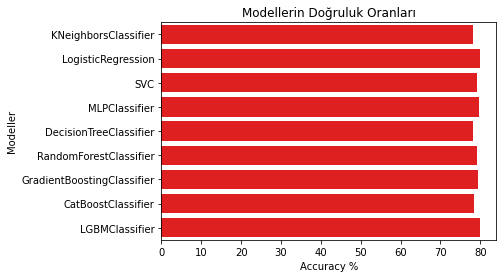

In [103]:
sns.barplot(x = 'Accuracy', y = 'Modeller', data = sonuclar, color = "r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [104]:
sonuclar

,modeller,Accuracy,Modeller
0,NaN,78.151659,KNeighborsClassifier
0,NaN,79.810427,LogisticRegression
0,NaN,79.099526,SVC
0,NaN,79.668246,MLPClassifier
0,NaN,78.151659,DecisionTreeClassifier
0,NaN,79.241706,RandomForestClassifier
0,NaN,79.336493,GradientBoostingClassifier
0,NaN,78.483412,CatBoostClassifier
0,NaN,80.000000,LGBMClassifier


In [ ]:
# En iyi doğruluk oranını veren model LGBM Classifier.